In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 80

## Read images, split channels, merge

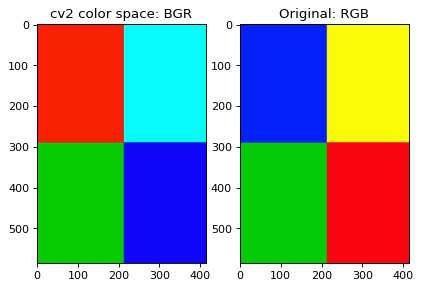

In [19]:
img = cv2.imread("./images/RGBY.jpg")
ori_img = plt.imread('./images/RGBY.jpg')

fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes[0].imshow(img)
axes[0].set_title("cv2 color space: BGR")

# axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(ori_img)
axes[1].set_title("Original: RGB")
plt.show()

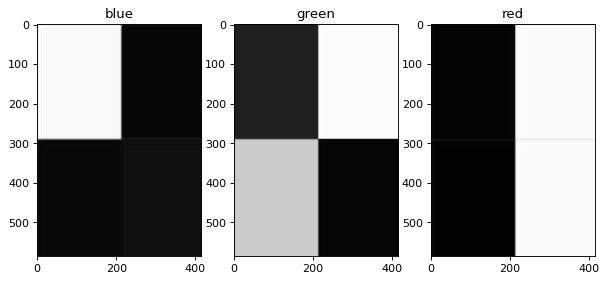

In [20]:
bgr = cv2.split(img)
name = ['blue', 'green', 'red']
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
for i, c in enumerate(bgr):
    axes[i].imshow(c, cmap='gray')
    axes[i].set_title(name[i])

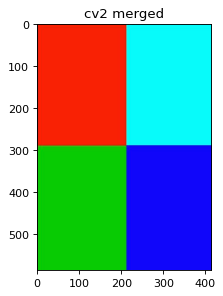

In [21]:
img_merged = cv2.merge(bgr)
plt.figure(figsize=(3, 4))
plt.imshow(img_merged)
plt.title('cv2 merged')
plt.show()

## Resize

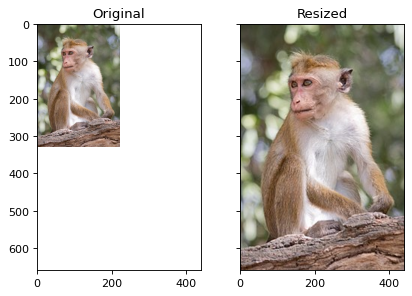

In [22]:
img = cv2.imread("images/monkey.jpg", 1) # 0: gray, 1: BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized = cv2.resize(
    img,
    None, # output image size
    fx=2, # scale factor along x
    fy=2, # scale factor along y
    interpolation=cv2.INTER_CUBIC, # shrink: INTER_AREA, enlarge: INTER_LINEAR,CUBIC
)

fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharex=True, sharey=True)
axes[0].imshow(img)
axes[0].set_title('Original')
axes[1].imshow(resized)
axes[1].set_title('Resized')
plt.show()

## Denoising

Take a kernel(e.g. 3x3 size matrix), colvolve with original image.

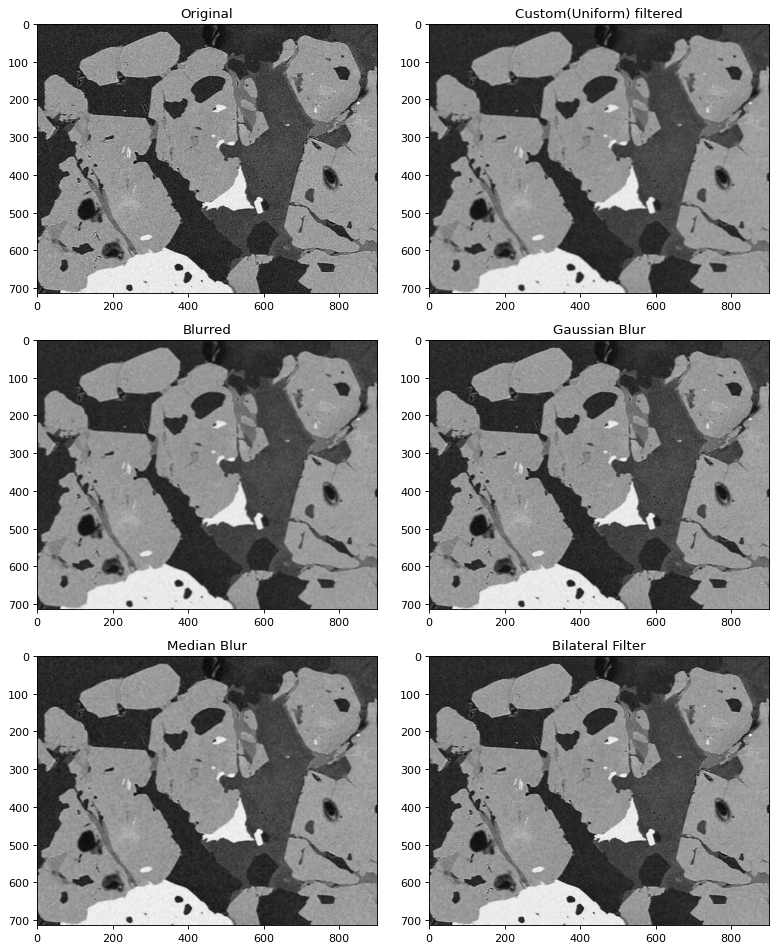

In [23]:
img = cv2.imread('images/BSE_Google_noisy.jpg', 1)

kernel_size = 5

# custom(uniform) filter
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / kernel_size**2 
img_custom = cv2.filter2D(img, -1, kernel)
# Blur
blur = cv2.blur(img, (kernel_size, kernel_size))
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
# Median Blur (non linear)
median_blur = cv2.medianBlur(img, kernel_size)
# Bilateral Blur (non linear)
bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)

nrow = 3
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*5, nrow*4), dpi=80)
axes = axes.ravel()
axes[0].imshow(img)
axes[0].set_title('Original')
axes[1].imshow(img_custom)
axes[1].set_title('Custom(Uniform) filtered')
axes[2].imshow(blur)
axes[2].set_title('Blurred')
axes[3].imshow(gaussian_blur)
axes[3].set_title('Gaussian Blur')
axes[4].imshow(median_blur)
axes[4].set_title('Median Blur')
axes[5].imshow(bilateral_blur)
axes[5].set_title('Bilateral Filter')
plt.tight_layout()
plt.show()

- Bilateral filter  

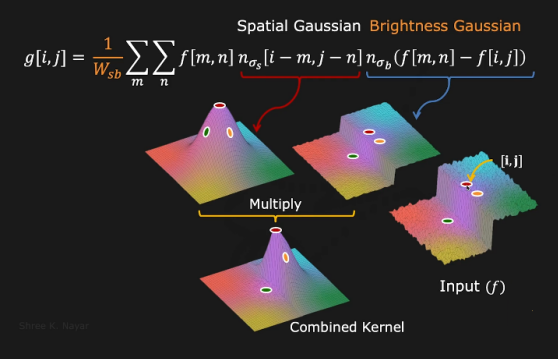

ref: https://www.youtube.com/watch?v=7FP7ndMEfsc&ab_channel=FirstPrinciplesofComputerVision

## Edge detection

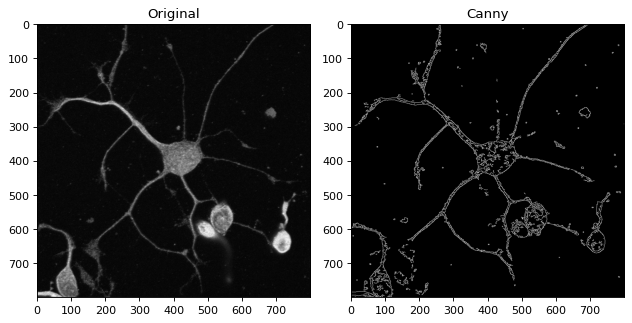

In [24]:
img = cv2.imread('images/Neuron.jpg', 0)

edges = cv2.Canny(img, 100, 200)

nrow = 1
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*4, nrow*4))
axes = axes.ravel()
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny')
plt.tight_layout()
plt.show()